In [1]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [2]:
# helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# the dataset has 10 classes for clothing
class_labels = ['Tshirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot']

In [5]:
# convert images to grey scale
train_images = train_images / 255.0
test_images = test_images / 255.0

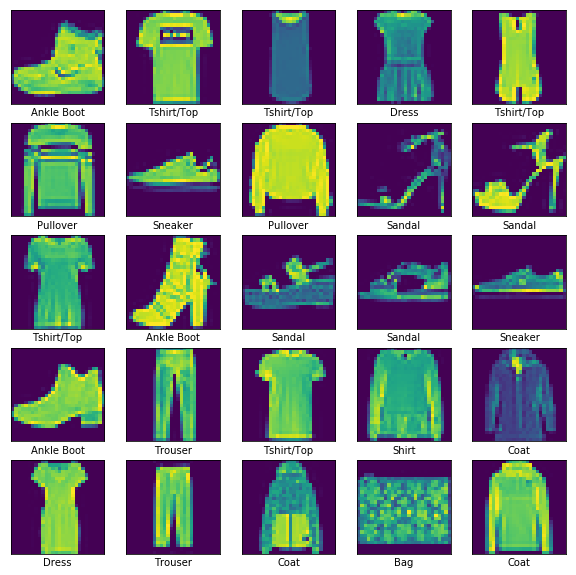

In [6]:
# plot few training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [7]:
# build model
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                          keras.layers.Dense(128, activation='relu'), 
                          keras.layers.Dense(10, activation='softmax')])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# train model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4935 - acc: 0.8269
Epoch 2/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3741 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3371 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3143 - acc: 0.8842
Epoch 5/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2973 - acc: 0.8902


In [10]:
# run model
predictions = model.predict(test_images)

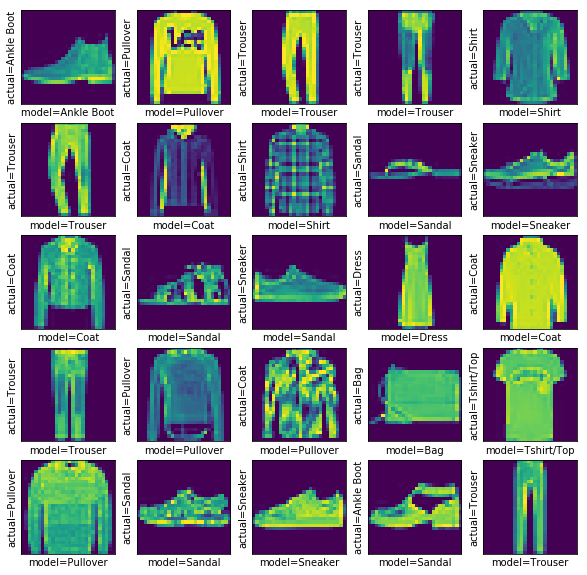

In [11]:
# plot predicted vs actual labels for few test images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    predicted_class = "model=" + class_labels[np.argmax(predictions[i])]
    plt.xlabel(predicted_class)
    true_class = "actual=" + class_labels[test_labels[i]]
    plt.ylabel(true_class)
plt.show()

In [12]:
# check accuracy on test images
model.evaluate(test_images, test_labels)[1]

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3446 - acc: 0.8773


0.8773

In [13]:
# yay, done!